# How to use jupyter notebook
## This notebook shows how you can use IPython to run RQALpha and back-testing.

### 1.Run RQALpha use command line, like using bash in a termial/TTY. just add '!' before your commands

In [1]:
# show command options
!rqalpha --help

Usage: rqalpha [OPTIONS] COMMAND [ARGS]...

Options:
  -v, --verbose
  --help         Show this message and exit.

Commands:
  examples         Generate example strategies to target folder
  generate_config  Generate default config file
  mod              Mod management command rqalpha mod list...
  plot             [sys_analyser] draw result DataFrame
  report           [sys_analyser] Generate report from backtest...
  run              Start to run a strategy
  update_bundle    Sync Data Bundle
  version          Output Version Info


In [2]:
#show run command options
!rqalpha run --help

Usage: rqalpha run [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --dividend-reinvestment         enable dividend reinvestment
  --config TEXT                   config file path
  -mc, --mod-config TEXT...       mod extra config
  --stock-t1 / --no-stock-t1      [sys_accounts] enable/disable 

In [3]:
# run a back-testing script file use rqalpha
# this command will save back-testing result to 
# `pwd`/../python/demo.result.pkl and save plotting 
# as image file to `pwd`/../python/demo.result.png

!rqalpha run -o `pwd`/../python/demo.result.pkl \
             --plot-save `pwd`/../python/demo.result.png \
             -s 20160101 \
             -e 20171020 \
             -bm 000300.XSHG \
             -f `pwd`/../python/demo.py \
             --account stock 100000 \
             -l error
            
# plotting a test result
#!rqalpha plot `pwd`/../python/demo.result.pkl

### 2.Run RQALpha use %%rqalpha extentsion, like using IPython shell, supports interactive mode.

In [4]:
# load rqalpha extentsion if needed
%load_ext rqalpha

In [5]:
# show interactive shell options
%rqalpha --help

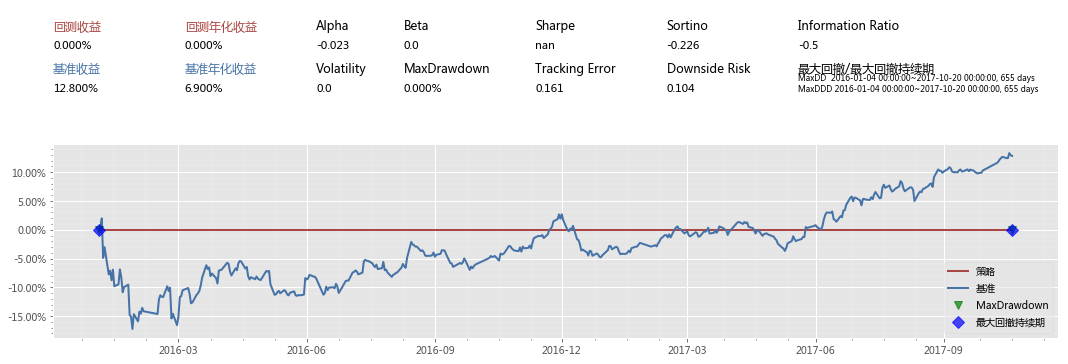

In [6]:
# use interactive mode
%rqalpha -s 20160101 -e 20171020 -p -bm 000300.XSHG --account stock 100000

def init(context):
    logger.info("init")
    context.s1 = "000002.XSHG"
    update_universe(context.s1)
    context.fired = False

def before_trading(context):
    pass

def handle_bar(context, bar_dict):
    if not context.fired:
        order_percent(context.s1, 1)
        context.fired = True


### 3.Run RQALpha use pure python codes, like using "import rqalpha" in your IDE develop enviroment.

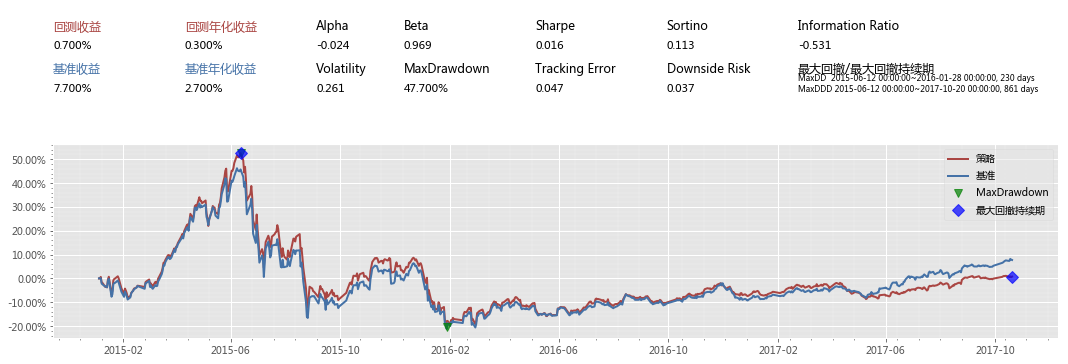

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2015-01-05  1678.42      98321.58                  1.000    100000.00   
  2015-01-06  1678.42      98308.62                  1.000     99987.04   
  2015-01-07  1678.42      98382.33                  1.000    100060.75   
  2015-01-08  1678.42      96100.02                  1.001     97778.44   
  2015-01-09  1678.42      95761.44                  0.978     97439.86   
  2015-01-12  1678.42      94866.66                  0.974     96545.08   
  2015-01-13  1678.42      94879.08                  0.965     96557.50   
  2015-01-14  1678.42      94565.34                  0.966     96243.76   
  2015-01-15  1678.42      97311.24                  0.962     98989.66   
  2015-01-16  1678.42      98149.05                  0.990     99827.47   
  2015-01-19  1678.42      90589.32                  0.998   

In [7]:
# -*- coding: utf-8 -*-

from rqalpha import run_code

code = """
from rqalpha.api import *

def init(context):
    logger.info("init")
    context.s1 = "000001.XSHG"
    update_universe(context.s1)
    context.fired = False

def before_trading(context):
    pass


def handle_bar(context, bar_dict):
    if not context.fired:
        order_percent(context.s1, 1)
        context.fired = True
"""

config = {
  "base": {
    "start_date": "2015-01-01",
    "end_date": "2017-10-20",
    "benchmark": "000300.XSHG",
    #"frequency": "1d",
    #"strategy_file": "rqalpha/examples/golden_cross.py",
    "accounts": {
      "stock": 100000
    }
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
      #"output_file": "results/out-test.pkl"
    }
  }
}

run_code(code, config)